# Notebook for debugging

***

In [1]:
%run -i imports.py
%matplotlib inline

Python==3.10.13

numpy==1.26.3
pandas==2.2.0


***

In [66]:
particles = pypiv.Particle(4, 
                                size=(512,512), 
                                densities=(0.01,0.05), 
                                seeding_mode='random', 
                                random_seed=101)

In [67]:
particles.density_per_image

array([0.0172757 , 0.04142407, 0.04861933, 0.01929415])

In [68]:
particles.n_of_particles

[4528, 10859, 12745, 5057]

In [69]:
seeded_images = particles.seed_particles()

In [70]:
init_image = pypiv.Image(particles)

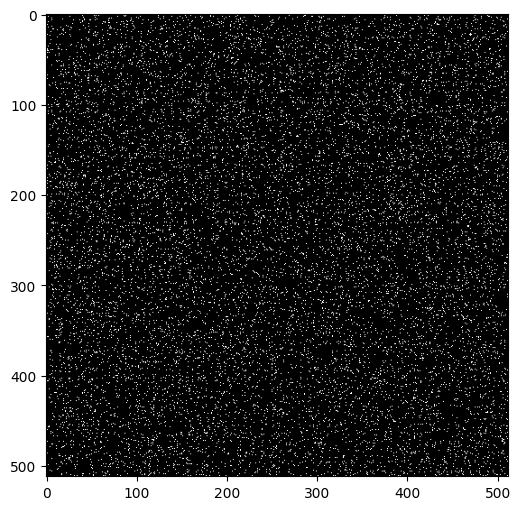

In [71]:
pypiv.plot_image(seeded_images[2], cmap='Greys_r', figsize=(6,6));

***